In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open the data file
df = pd.read_csv('/Users/II00459/Downloads/data.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

In [3]:
# correlation to the output
corr = abs(df.corr()['Bankrupt?'])

# decide the threshold
corr_feat = corr[abs(corr) >= 0.01]

# columns above the theshold (we will keep them)
corr_feat_col = corr_feat.index
df=df[corr_feat_col]

In [4]:
#find highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold and (corr_matrix.columns[j] not in col_corr): 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [5]:
# see how many 
corr_features = correlation(df, 0.6)
len(set(corr_features))

34

In [6]:
df=df.drop(corr_features,axis=1)

In [7]:
X=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_train,y_train,test_size=0.2)

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [11]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass
def generate_auc_roc_curve(clf, X_test_1):
    y_pred_proba = clf.predict_proba(X_test_1)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_1,  y_pred_proba)
    auc = roc_auc_score(y_test_1, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [12]:
'''names = ["Nearest Neighbors", "Linear SVM",
         "Decision Tree"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=4.5)]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train_1, y_train_1)
    score = clf.score(X_test_1, y_test_1)'''

'names = ["Nearest Neighbors", "Linear SVM",\n         "Decision Tree"]\nclassifiers = [\n    KNeighborsClassifier(3),\n    SVC(kernel="linear", C=0.025),\n    DecisionTreeClassifier(max_depth=4.5)]\n\n# iterate over classifiers\nfor name, clf in zip(names, classifiers):\n    clf.fit(X_train_1, y_train_1)\n    score = clf.score(X_test_1, y_test_1)'

In [13]:
model_1=KNeighborsClassifier(3)
model_1.fit(X_train_1,y_train_1)
test_pred_1=model_1.predict(X_test_1)
pd.crosstab(test_pred_1, y_test_1, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,1052,38
1,1,0


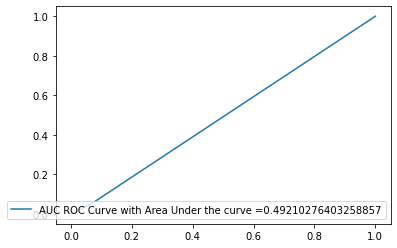

In [14]:
generate_auc_roc_curve(model_1, X_test_1)

In [15]:
generate_model_report(y_test_1, test_pred_1)

Accuracy =  0.9642529789184234
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


In [16]:
#SupportVectorMachine

In [17]:
'''model_2=SVC(kernel="linear", C=0.025)
model_2.fit(X_train_1,y_train_1)
test_pred_2=model_1.predict(X_test_1)
pd.crosstab(test_pred_2, y_test_1, rownames=['Predicted'], colnames=['Actual'])'''

'model_2=SVC(kernel="linear", C=0.025)\nmodel_2.fit(X_train_1,y_train_1)\ntest_pred_2=model_1.predict(X_test_1)\npd.crosstab(test_pred_2, y_test_1, rownames=[\'Predicted\'], colnames=[\'Actual\'])'

In [18]:
'''generate_auc_roc_curve(model_2, X_test_1)'''

'generate_auc_roc_curve(model_2, X_test_1)'

In [19]:
'''generate_model_report(y_test_1, test_pred_2)'''

'generate_model_report(y_test_1, test_pred_2)'

In [20]:
#Decision Tree Classifier

In [21]:
model_3=DecisionTreeClassifier(max_depth=4.5)
model_3.fit(X_train_1,y_train_1)
test_pred_3=model_3.predict(X_test_1)
pd.crosstab(test_pred_3, y_test_1, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,1038,27
1,15,11


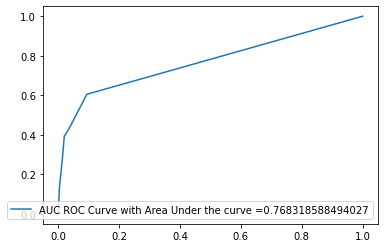

In [22]:
generate_auc_roc_curve(model_3, X_test_1)

In [23]:
generate_model_report(y_test_1, test_pred_3)

Accuracy =  0.9615032080659945
Precision =  0.4230769230769231
Recall =  0.2894736842105263
F1 Score =  0.34375
